이산형 확률분포

In [7]:
#1차원 이산분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X = [x_set,f]

In [5]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

Text(0, 0.5, 'probability')

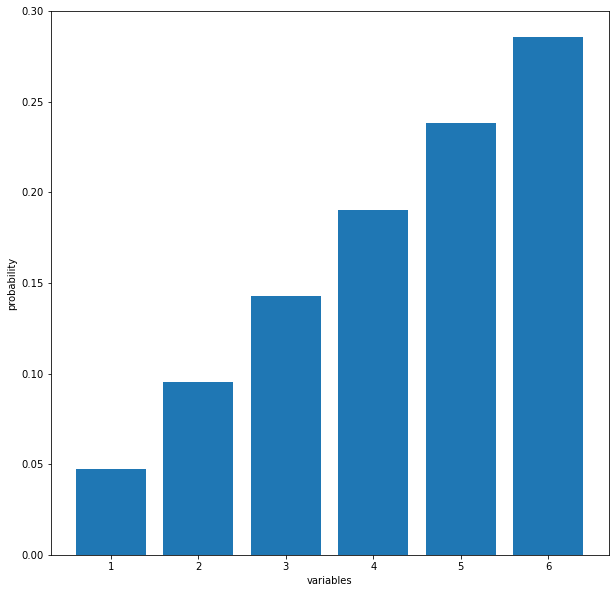

In [6]:
plt.figure(figsize = (10,10))
plt.bar(x_set,prob)
plt.xlabel('variables')
plt.ylabel('probability')

In [ ]:
np.all(prob>0)

In [ ]:
np.sum(prob)

In [ ]:
# 누적 분포 함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [ ]:
F(6)

In [ ]:
# 확률 변수의 변환 : 확률변수 X 에 2를 곱하고 3은 더한 2X+3
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob= np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

In [ ]:
#1차원 이산형 확률변수 지표
#평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지효가 되며 기대값이라고도 부른다
np.sum([x_k *f(x_k) for x_k in x_set])


In [ ]:
# 확률변수의 기댓값은 확률 변수를 무제한 시행하여 얻은 실현값의 평균
sample= np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

In [2]:
# 일반화
def E(X,g=lambda x: x):
    x_set ,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X)

In [ ]:
E(X,g=lambda x:2*x+3)

In [ ]:
# 기댓값의 선형성
2 * E(X) +3

In [ ]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
# 일반화
def V(X,g = lambda x:x):
    x_set ,f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X)

In [ ]:
V(X,g=lambda x:2*x)

In [ ]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [ ]:
#결합확률함수
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0

In [ ]:
XY = [x_set,y_set,f_XY]
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor = False)
ax.set_yticklabels(np.arange(2,13),minor = False)
# y축을 내림차순의 숫자가 되게하여 위아래를 역전시킴
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)

In [ ]:
np.all(prob>=0)

In [ ]:
np.sum(prob)

In [ ]:
# 주변 확률 분포 (marginal probability distribution)
# 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률 변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [ ]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:
X = [x_set,f_X]
Y = [y_set,f_Y]

In [ ]:
X

In [ ]:
Y

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_label')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_label')
ax2.set_ylabel('probability')
ax2.set_xticks(y_set)

In [ ]:
# 2차원 이산형 확률분포의 지표
# 기댓값
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
li =[]
for y in y_set:
    for x in x_set:
        li.append(x*f_XY(x,y))
np.sum(li)

In [ ]:
def E(XY,g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
mean_X = E(XY,lambda x,y:x)
mean_X

In [ ]:
mean_Y = E(XY,lambda x,y:y)
mean_Y

In [ ]:
# 기대값의 선형성
E(XY,lambda x,y:2*x+3*y)

In [ ]:
# 분산: X의 분산이라면 X에 관한 편차 제곱의 기대값으로 구할 수 있다
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
np.sum([(y_j-mean_Y)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
def V(XY,g):
    x_set,y_set, f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
V(XY,lambda x,y:3*y)

In [ ]:
# 공분산
def Cov(XY):
    x_set,y_set,f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j - mean_Y) *f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

Cov(XY)

In [ ]:
# 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
var_x = V(XY,lambda x,y:x)
var_y = V(XY,lambda x,y:y)
cov_xy = Cov(XY)
cov_xy/np.sqrt(var_x*var_y)

In [ ]:
# 분산과 공분산의 공식
a = 2
b = 3
a**2*var_x+b**2*var_y +2*a*b*cov_xy

대표적인 이산형 확률분포

In [22]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g = lambda x:x):
    x_set , f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X,g = lambda x:x):
    x_set , f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

print(E(X))
print(V(X))

def check_prob(X): # 확률분포를 인수로 가지며 ㄴ기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.around(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability {prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기대값을 그리기 위한 함수
    x_set,f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label = 'prob')
    ax.vlines(E(X),0,1,label = 'mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()

4.333333333333333
2.2222222222222223


#### 베르누이 분포
- 가장 기본적인 이산형 확률 분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한번 굴려 6이 나오지 않을 확률

In [9]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [132]:
p = 0.3
X = Bern(p)

In [133]:
check_prob(X)

expected value 0.3
variance 0.21


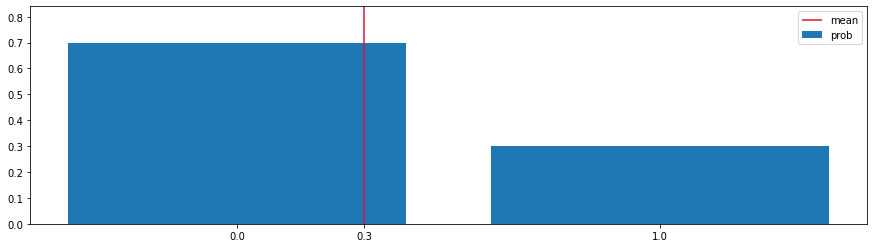

In [186]:
plot_prob(X)

In [135]:
rv = stats.bernoulli(p)

In [136]:
rv.pmf(0),rv.pmf(1)

(0.7, 0.3)

In [137]:
rv.pmf([0,1])

array([0.7, 0.3])

In [138]:
rv.cdf([0,1])

array([0.7, 1. ])

In [139]:
rv.mean(), rv.var()

(0.3, 0.21)

#### 이항 분포
- 성공 확률이 p 인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,...,n\}$)

       0            (otherwise)

In [16]:
from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f

In [28]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요.
x_set , f = Bin(10,0.3)
f(0.3) , E(Bin(10,0.3)),V(Bin(10,0.3))

(0, 2.9999999999999982, 2.099999999999999)

In [26]:
check_prob(Bin(10,0.3))

expected value 3.0
variance 2.1


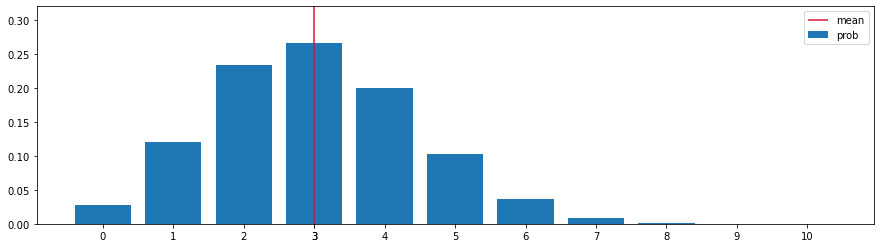

In [29]:
#[과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(Bin(10,0.3))

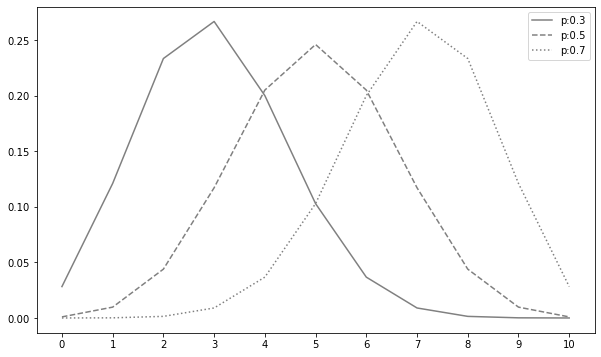

In [23]:
# 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변화는 모습을 시각화 하세요
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

x_set=np.arange(11)
for p, ls in zip([0.3, 0.5, 0.7] , linestyles):
    rv = stats.binom(10,p)
    ax.plot(x_set, rv.pmf(x_set),label = f'p:{p}' ,ls = ls , color = 'gray')
ax.set_xticks(x_set)
ax.legend()
plt.show()

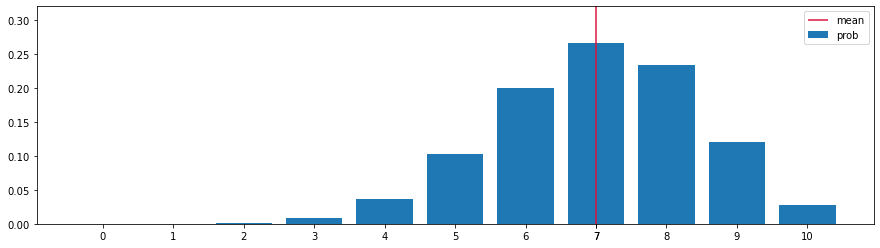

In [189]:
plot_prob(Bin(10,0.7))

#### 기하분포
- 베르누이 시행에서 처음 성공할때까지 반복한 시행 횟수가 따르는 분포
- 기하 분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3\})$

       0        (otherwise)
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$

In [41]:
#변수는 1~29로 한정
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) *p
        else:
            return 0
        
    return x_set, f

In [42]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
check_prob(Ge(0.5))

expected value 2.0
variance 2.0


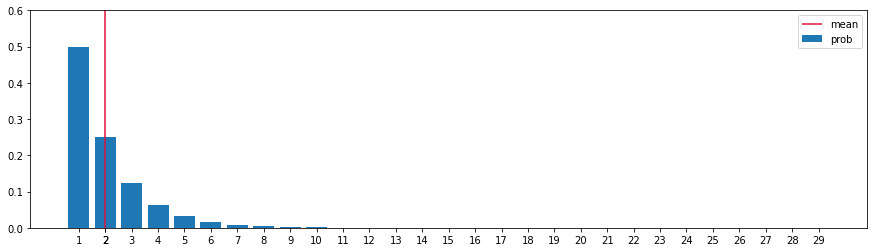

In [43]:
# [과제] 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(Ge(0.5))

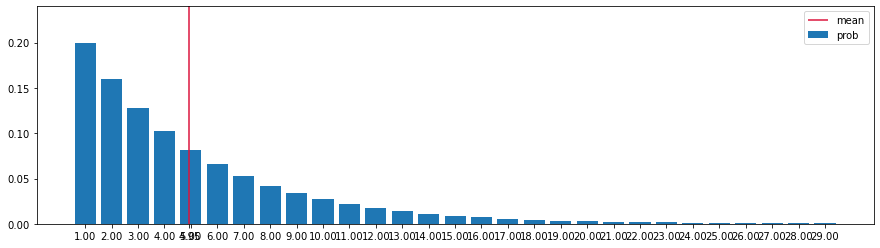

In [191]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
plot_prob(Ge(0.2))

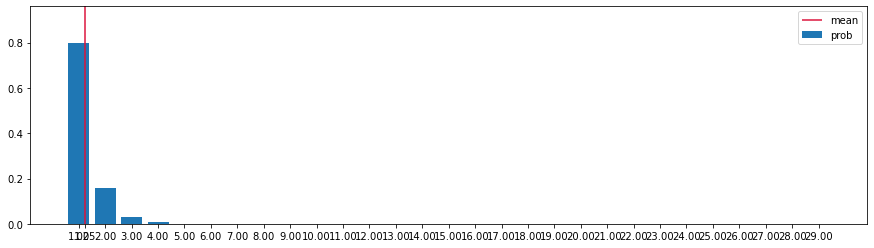

In [192]:
plot_prob(Ge(0.8))

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건 수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.

예 ) 하루에 교통사고가 한건도 일어나지 않을 확률

P(X=0) = 2!/0! *$e^{-2}$ = 0.135

- 포아송 분포의 기대값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$
  
      0               (otherwise)

In [64]:
# 확률 변수를 1 이상 19 이하로 설정한 사용자 함수
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return (lam**x)/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f

In [65]:
# lambda가 0.3일때 포아송 분포의 기댓값과 분산을 구하시오
check_prob(Poi(3))

expected value 3.0
variance 3.0


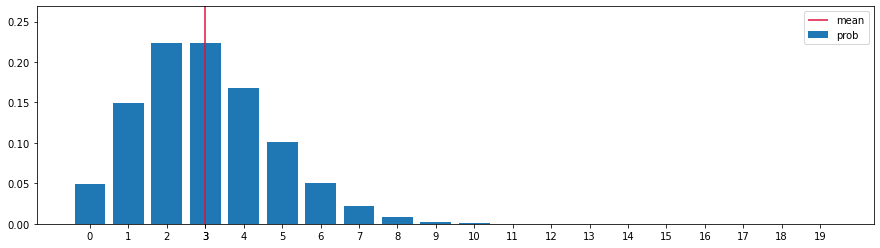

In [66]:
# 확률함수와 기대값 시각화
plot_prob(Poi(3))

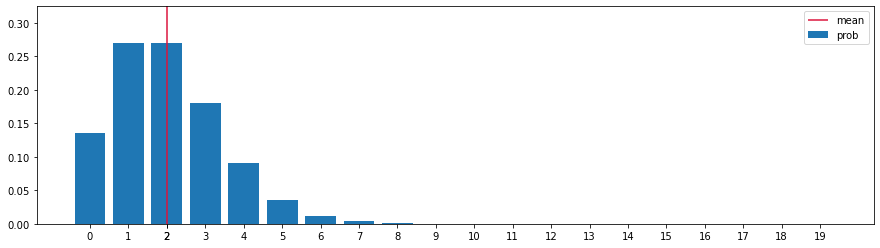

In [67]:
# lambda가 0.2 0.5 0.8로 변할 때 확률함수가 변화하는 모습을 시각화
plot_prob(Poi(2))

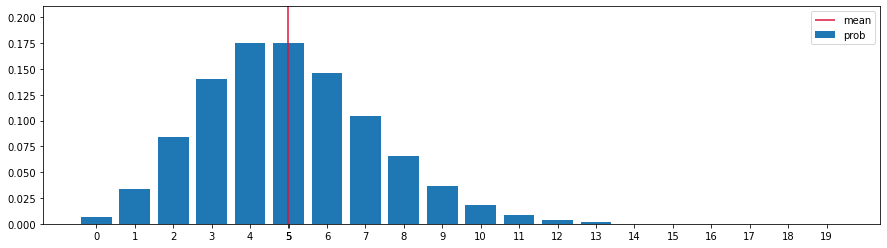

In [68]:
plot_prob(Poi(5))

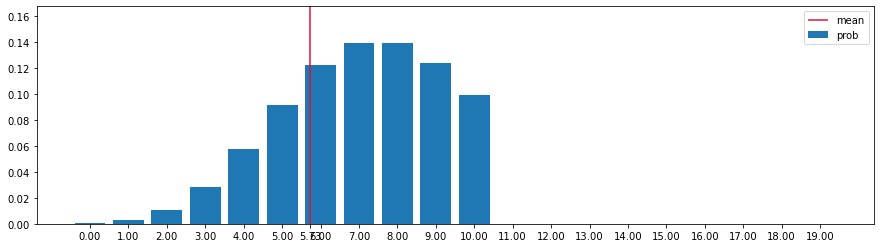

In [69]:
plot_prob(Poi(8))

In [ ]:
# 베르누이, 이항, 기하, 포아송 분포의 사례를 각각 2개씩 제시 및 설명

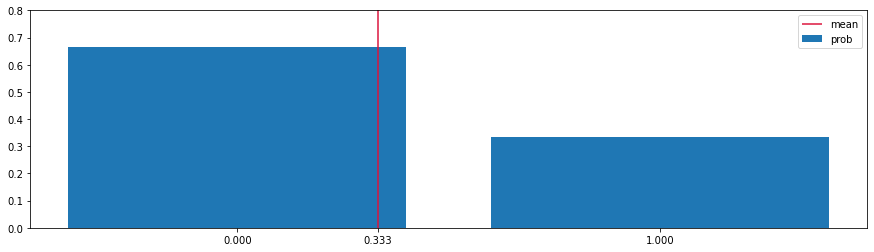

In [197]:
# 베르누이 1 : 가위바위보에서 가위를 낼 확률
def Bern1(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

plot_prob(Bern1(1/3))

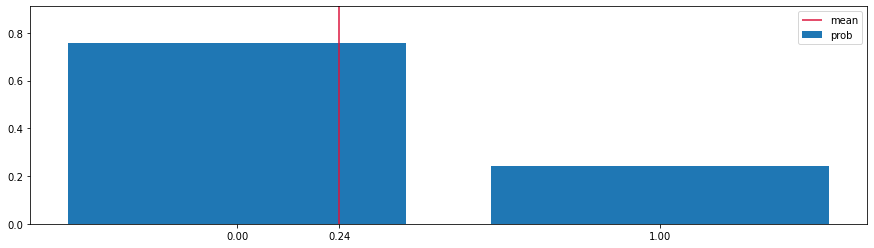

In [198]:
# 베르누이 2 : 트럼프 카드 뭉치에서 스페이드 카드를 뽑을 확률 / 트럼프 카드에 4개의 문양 * 13장의 카드 + 조커 두장
def Bern2(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

plot_prob(Bern2(13/54))

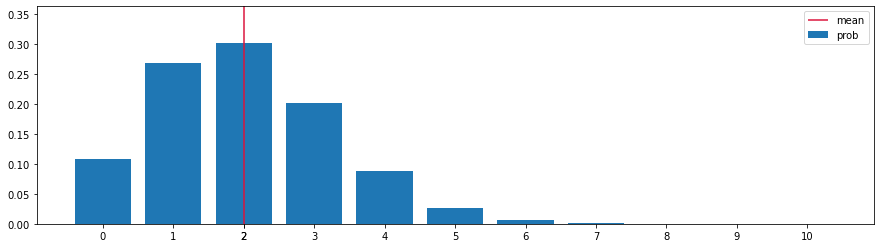

In [30]:
# 이항 분포 1 : 무지개색의 공들이 담긴 상자에서 10번을 뽑아 빨간색이 나올 확률의 분포
from scipy.special import comb
def Bin1(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f
plot_prob(Bin1(10,1/5))

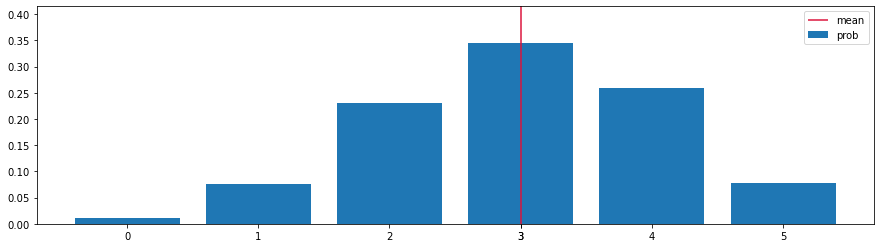

In [35]:
# 이항 분포2 : 주사위를 15번 굴려 1의 눈이 나올 확률의 분포
from scipy.special import comb
def Bin2(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f

plot_prob(Bin2(5,3/5))

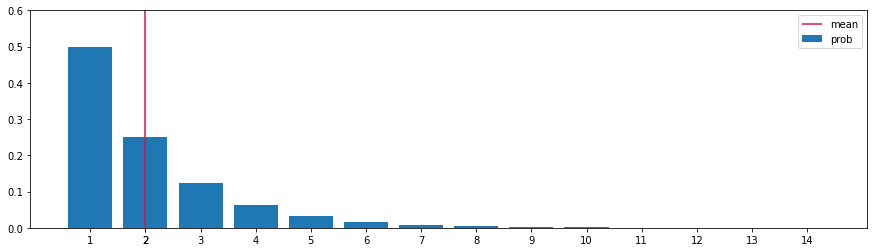

In [202]:
# 기하 분포 1: 홀짝을 맞출 확률 (최대 15번까지)
def Ge1(p):
    x_set = np.arange(1,15)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) *p
        else:
            return 0
        
    return x_set, f
plot_prob(Ge1(0.5))

expected value 2.0
variance 2.0


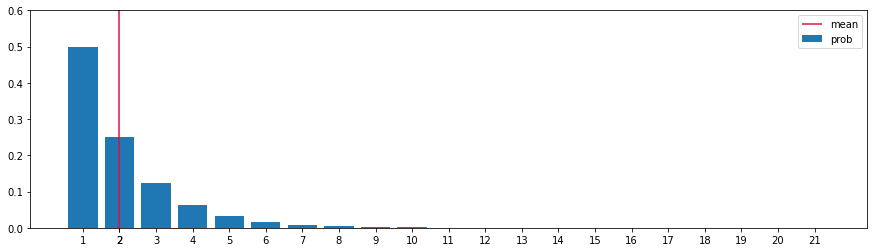

In [55]:
# 기하 분포 2: 양궁 과녁에 10점을 맞출 확률 ( 준비된 화살은 12발)
def Ge2(p):
    x_set = np.arange(1,22)
    def f(x):
        if x in x_set:
            return ((1-p)**(x-1)) *p
        else:
            return 0
        
    return x_set, f
plot_prob(Ge2(0.5))
check_prob(Ge2(0.5))

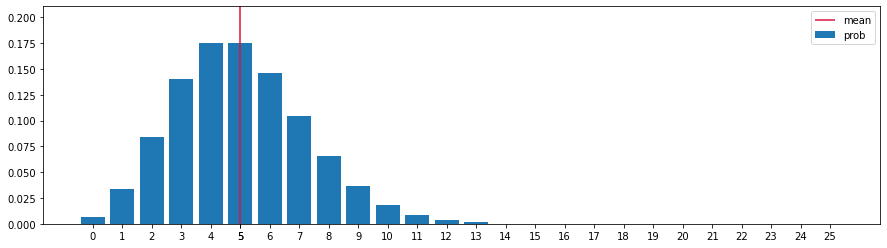

In [206]:
# 포아송 분포 1: 저녁 시간대에 평균 5건의 주문을 받는 식당의 주문 건수에 대한 확률의 분포 (최대 25건까지)
from scipy.special import factorial
def Poi1(lam):
    x_set = np.arange(26)
    def f(x):
        if x in x_set:
            return lam**x/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f
plot_prob(Poi1(5))

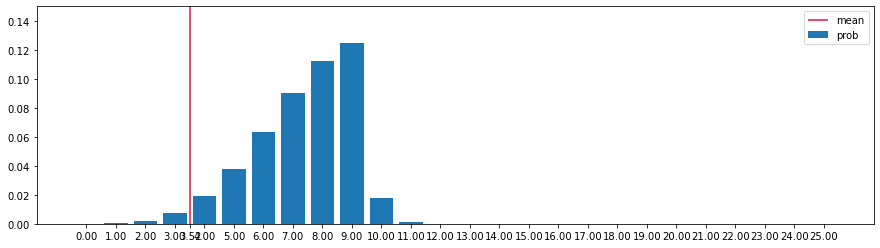

In [10]:
# 포아송 분포 2 : 하루 평균 10명이 방문하는 동물병원의 방문객 수에 대한 확률의 분포 (최대 20건까지)
from scipy.special import factorial
def Poi2(lam):
    x_set = np.arange(26)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f
plot_prob(Poi2(10))

연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 연속형 확률변수의 경우 계산과정에 적분이 포함된다. 적분은 SciPy의 integrate 모듈을 사용하여 구현한다.

연속형 확률 분포와 확률밀도함수
- 특정값이 될 확률은 0, 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 넓이)
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포. 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포
 - 누적분포함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률. Cumulative density function
   * stats.norm.cdf(loc=4, scale = 0.8, x=3)
 - 정규분포의 확률밀도 계산
   * 확률 변수 3일때의 확률밀도 N(3|4, 0.8**2)
   * stats.norm.pdf(loc=4,scale=0.8,x=3) Probability density function
 - 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우
   * 이 때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우 이 때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트
 - stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준 정규분포가 됨. probability density function
 - stats.norm.rvs() 함수는 정규확률분포로부터 난수 생성

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
x_range = np.array([0,1])
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0
    
X = [x_range,f]

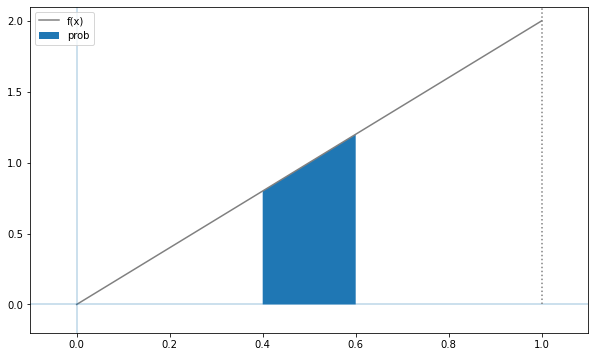

In [75]:
xs = np.linspace(x_range[0],x_range[1],100)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'gray')
ax.hlines(0,-0.2,1.2,alpha = 0.3)
ax.vlines(0,-0.2,2.2,alpha = 0.3)
ax.vlines(xs.max(),0,2.2,linestyles = ':',color = 'gray')
# 0.4 ~0.6 x좌표를 setting
xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs],label = 'prob')

ax.set_xticks(np.arange(-0.2,1.3,0.2))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()

In [78]:
# quad 함수는 적분값과 추정오차를 반환
# 피적분함수, 적분 범위
integrate.quad(f,0.4,0.6) 
#(확률 , 오차)

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률 변수에서는 확률의 성질이 수식을 만족해야 함
- f(x)가 항상 0 이상의 값을 취함
- f(x)에 대하여 무한대 범위의 적분 결과는 1

In [79]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수로 구함

0

In [81]:
integrate.quad(f, -np.inf,np.inf)[0]

1.0

In [83]:
np.pi

3.141592653589793

In [84]:
# 정규분포의 확률밀도 계산
# 확률변수 3일때의 확률밀도 N(3|4.0,0.8**2)

x = 3
mu = 4
sigma = 0.8
1/(np.sqrt(2*np.pi)*sigma) * np.exp(-1*((x-mu)**2)/(2*sigma**2))

0.22831135673627742

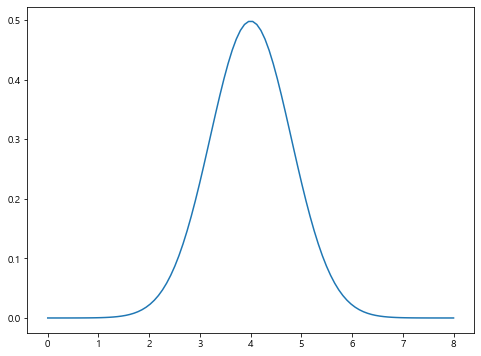

In [107]:
from matplotlib import rc
rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
rv = stats.norm(loc=4,scale = 0.8)
xx = np.linspace(0,8,100)
pdf = rv.pdf(xx)
plt.figure(figsize = (8,6))
plt.plot(xx,pdf)

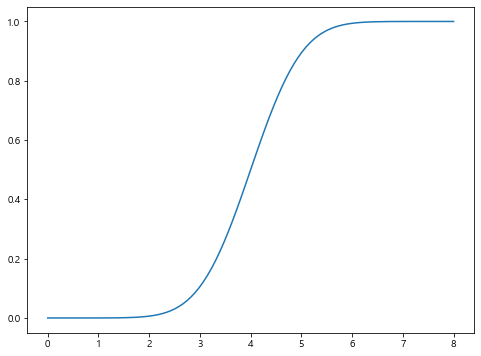

In [110]:
xx = np.linspace(0,8,100)
cdf = rv.cdf(xx)
plt.figure(figsize = (8,6))
plt.plot(xx,cdf)

In [111]:
rv.pdf(3), rv.cdf(3)

(0.2283113567362774, 0.10564977366685535)

In [113]:
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.2283113567362774

In [121]:
# 표준정규분포에서 확률변수가 1일 때의 확률밀도를 구하세요
stats.norm.pdf(loc=0,scale=1,x=1)

0.24197072451914337

In [122]:
# 정규 분포 객체 생성
norm_dist = stats.norm(loc=4,scale = 0.8)
norm_dist.pdf(x=3)

0.2283113567362774

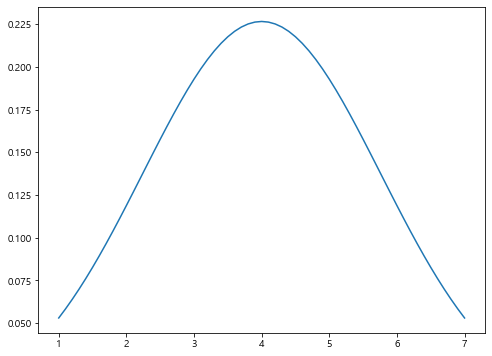

In [124]:
x_plot = np.arange(1,7.1,0.1)
rv = stats.norm(loc = np.mean(x_plot),scale = np.std(x_plot))
pdf = rv.pdf(x_plot)
plt.figure(figsize = (8,6))
plt.plot(x_plot,pdf)

In [126]:
# 표본이 어떤 값 이하가 되는 비율
np.random.seed(1)

simulated_sample = stats.norm.rvs(loc = 4,scale = 0.8 , size = 100000)
simulated_sample[:10]

array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [128]:
import pandas as pd

sr = pd.Series(simulated_sample)
sr.describe()

count    100000.000000
mean          4.004202
std           0.798667
min           0.538490
25%           3.465533
50%           4.004800
75%           4.539819
max           7.334494
dtype: float64

In [138]:
# 3보다 작은 샘플의 합계와 확률은?
print(sr.loc[sr<=3].sum())
arr = np.array(sr.loc[sr<=3])
print(len(sr.loc[sr<=3])/len(simulated_sample))

27151.549504137874
0.10371


In [146]:
#누적분포 함수 : 확률분포에서 얻은 확률변수 3 이하가 되는 확률(loc = 4,scale = 0.8)
rv = stats.norm(loc=4,scale = 0.8)
rv.cdf(3)

0.10564977366685535

In [147]:
# 정규분포는 평균에 대해 좌우 대칭
# 데이터가 평균값 이하가 될 확률 : 0.5
rv = stats.norm(loc = 4,scale = 0.8)
rv.cdf(4)

0.5

In [151]:
# 하측확률 : '확률변수 x가 N보다 작을 확률은 M%이다.'에서 M을 고정하고 N을 구하는 경우
# q : 하측확률 -> 퍼센트포인트
stats.norm.ppf(loc=4,scale=0.8, q =0.1)

2.9747587475643193

In [153]:
# 퍼센트포인트  -> 하측확률
stats.norm.cdf(loc=4,scale=0.8, x =2.9747587475643193)

0.09999999999999998

In [154]:
# 하측확률이 50%가 되는 퍼센트 포인트는 평균과 일치
stats.norm.ppf(loc=4,scale=0.8, q =0.5)

4.0

In [14]:
# 평균이 100, 표준편차가 10인 정규분포에서 하측확률이 0.3일 경우의 퍼센트포인트를 구하고 그 퍼센트포인트를 적용하여 하측확률을 구하세요
print(stats.norm.ppf(loc=100,scale=10,q=0.3))

94.75599487291959


In [15]:
print(stats.norm.cdf(loc=100,scale=10,x=94.75599487291959))

0.2999999999999998


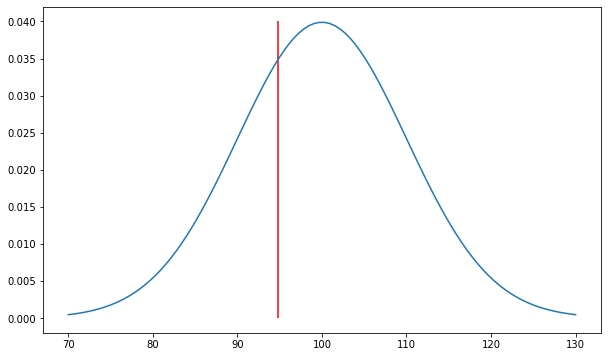

In [16]:
# 상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp간의 관계를 확인하세요
x_plot = np.linspace(70,130,100)
rv = stats.norm(loc = 100,scale = 10)
pdf = rv.pdf(x_plot)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.vlines(stats.norm.ppf(loc=100,scale=10,q=0.3),0,0.04,color = 'red')
ax.plot(x_plot,pdf)

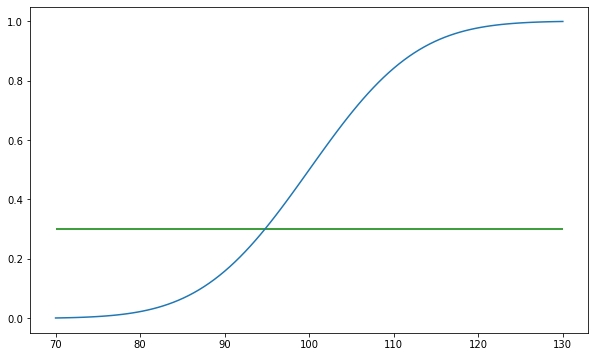

In [17]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

x_plot = np.linspace(70,130,100)
rv = stats.norm(loc = 100,scale = 10)
cdf = rv.cdf(x_plot)

ax.hlines(stats.norm.cdf(loc=100,scale=10,x=94.75599487291959),70,130,color = 'green')
ax.plot(x_plot,cdf)

In [18]:
rv = stats.norm(0,1)
# 0까지의 누적 분포
rv.cdf(0)

0.5

In [46]:
plt.style.use('seaborn')

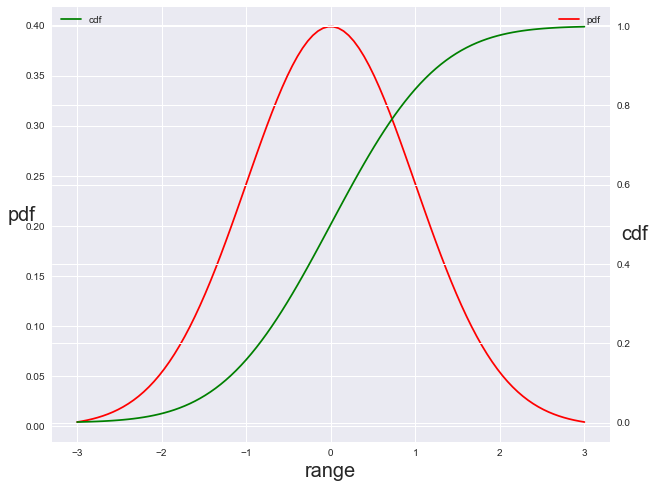

In [55]:
xx = np.linspace(-3,3,100)
rv = stats.norm(0,1)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.plot(xx,pdf,color = 'red',label = 'pdf')
ax1.set_xlabel('range',fontsize = 20)
ax1.set_ylabel('pdf',rotation = 0,fontsize = 20)
ax1.legend()
ax2.plot(xx,cdf, color = 'green',label = 'cdf')
ax2.set_ylabel('cdf',rotation = 0,fontsize = 20)
ax2.legend()

In [19]:
#누적분포가 0.5인 x값
rv.ppf(0.5)

0.0

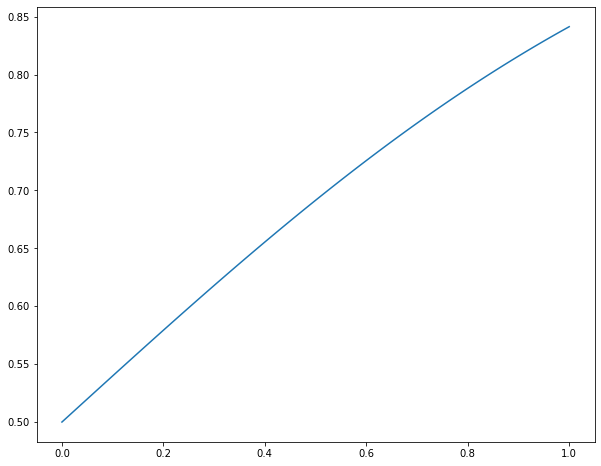

In [39]:
# 0~1 사이의 누적확률분포 
xx = np.linspace(0,1,100)
rv = stats.norm(0,1)
cdf = rv.cdf(xx)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.plot(xx,cdf)

In [21]:
# (-2<x<2) 의 확률
rv.cdf(2)-rv.cdf(-2)

0.9544997361036416

In [56]:
# 상위 5%
rv.isf(0.05),rv.ppf(0.95)

(1.6448536269514729, 1.6448536269514722)

In [24]:
# 하위 5%
rv.ppf(0.05)

-1.6448536269514729

In [27]:
# 어느 회사에서 종업원들의 근부시간을 조사했는데 근무기간은 평균 11년, 표준편차 4년인 정규분포를 따름
# 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오.
rv = stats.norm(11,4)
1-rv.cdf(14)

0.22662735237686826

In [30]:
# 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일의 정규분포를 따른다.
# 전구의 수명이 760일 이하일 확률을 구하시오
rv = stats.norm(800,30)
rv.cdf(760)

0.09121121972586788

In [32]:
# 어느 고등학교 3학년 학생들의 수학 성적이 평균 70, 분산 64점인 정규분포를 따른다
# 점수가 80점 이상이고 90점 이하일 확률을 구하시오
rv = stats.norm(70,8)
rv.cdf(90)-rv.cdf(80)

0.09944010834107919

대표적인 연속형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
from scipy.optimize import minimize_scalar
warnings.filterwarnings('ignore')


linestyles = ['-','--',':']

def E(x, g=lambda x:x):
    x_range , f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X,g=lambda x:x):
    x_range, f =X
    mean = E(X,g)
    def integrand(x):
        return (g(x)-mean)**2*f(x)
    return integrate.quad(integrand,-np.inf,np.inf)[0]

def check_prob(X):
    x_range,f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf,np.inf)[0],6)
    assert prob_sum == 1, f'sum of probability = {prob_sum}'
    print(f'expected Value {E(X):.3f}')
    print(f'Variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f =X
    def F(x):
        return integrate.quad(f,-np.inf,x)[0]
    
    xs = np.linspace(x_min,x_max,100)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs,[f(x) for x in xs], label = 'f(x)', color ='gray')
    ax.plot(xs,[F(x) for x in xs],label = 'F(x)',ls = '--',color = 'gray')
    ax.legend()
    plt.show()

#### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현, 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 평균과 분산 두가지이다.

In [2]:
def N(mu,sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-((x-mu)**2)/(2*sigma**2))
    return x_range,f

In [3]:
mu,sigma = 2,0.5
X=N(mu,sigma)

In [4]:
check_prob(X)

expected Value 2.000
Variance 0.250


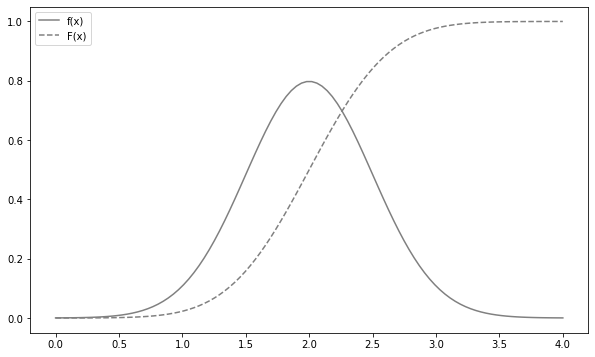

In [5]:
plot_prob(X,0,4)

In [6]:
rv = stats.norm(2,0.5)
print(rv.mean(),rv.var())

2.0 0.25


In [212]:
# pp가 2일때 확률밀도
rv.pdf(x=2)

0.7978845608028654

In [213]:
# pp가 2일 때 하측확률
rv.cdf(x=2)

0.5

In [214]:
# 상위 30% 점
rv.ppf(0.7)

2.2622002563540202

In [215]:
rv.isf(0.3)

2.2622002563540207

In [216]:
# 확률의 구간
rv.interval(0.95)

(1.020018007729973, 2.979981992270027)

In [217]:
rv.isf(0.95),rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

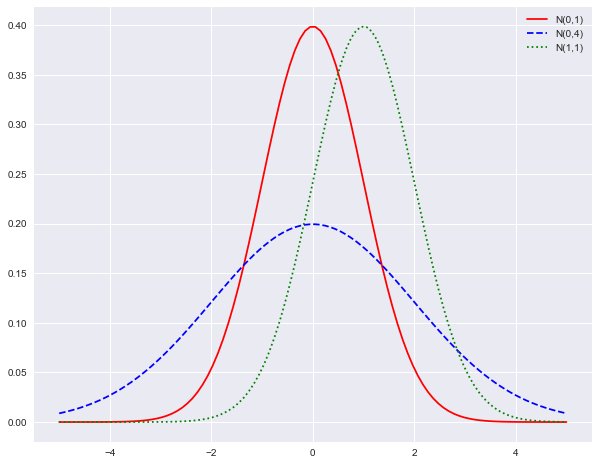

In [112]:
# N(mean,sigma**2) 파라미터를 각각 (0,1),(0,4),(1,1) 로 변경할 때의 정규분포를 시각화하세요
plt.figure(figsize = (10,8))


xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
colors = ['red','blue','green']

for param, ls , color in zip(params,linestyles,colors):
    mu, sigma = param
    rv = stats.norm(mu,sigma)
    plt.plot(xs,rv.pdf(xs), label = f'N({mu},{sigma**2})',ls=ls,color=color)
    
plt.legend()
plt.show()

#### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포이며 확률변수가 취할 수 있는 값은 0 이상의 실수
- 지수분포의 파라미터는 $\lambda$로 양의 실수이며 EX($\lambda$)로 표기한다

In [8]:
def Ex(lam):
    x_range = [0,np.inf]
    def f(x):
        if x>=0:
            return lam*np.exp(-lam*x)
        else:
            return 0
    return x_range, f

In [9]:
lam =3
X=Ex(lam)

In [10]:
check_prob(X)

expected Value 0.333
Variance 0.111


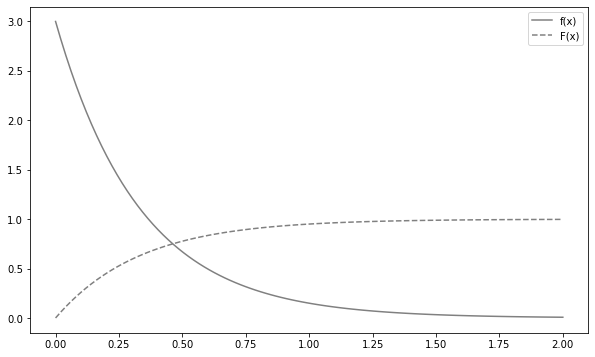

In [11]:
plot_prob(X,0,2)

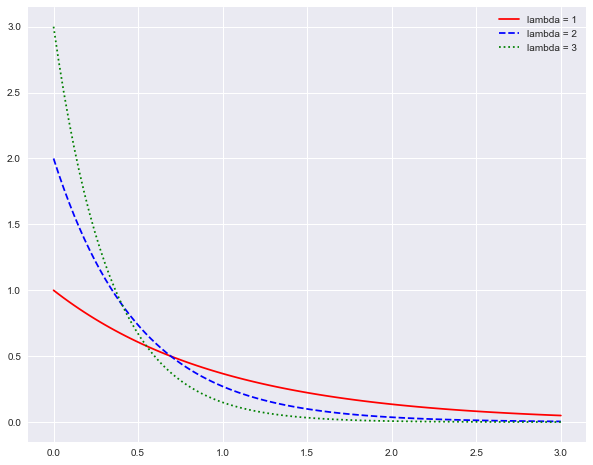

In [59]:
# 파라미터 lambda = [1,2,3]일 때 지수함수의 확률분포를 시각화하세요
plt.figure(figsize = (10,8))


xs = np.linspace(0,3,100)
lams = [1,2,3]
colors = ['red','blue','green']
for lam, ls, color in zip(lams,linestyles,colors):
    rv = stats.expon(scale = 1/lam)
    plt.plot(xs,rv.pdf(xs), label = f'lambda = {lam}',ls=ls,color=color)
    
plt.legend()
plt.show()

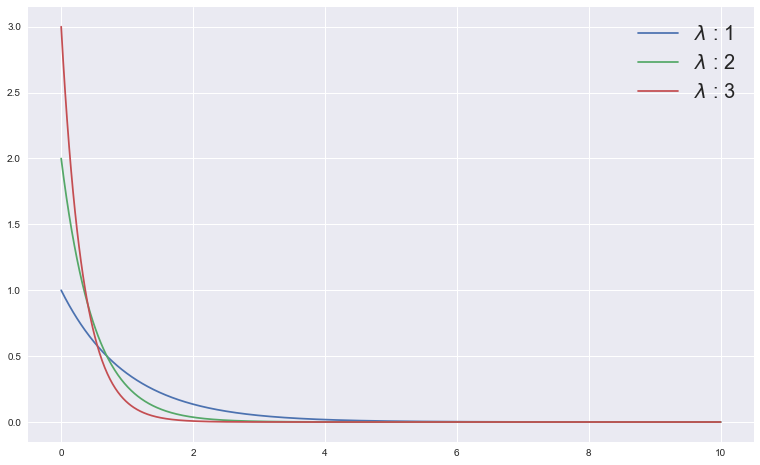

In [61]:
x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111)

for i in range(1, 4):
    lam = i * np.exp(-1*i * x)
    ax.plot(x, lam)
    ax.legend(['$\lambda$ : 1', '$\lambda$ : 2', '$\lambda$ : 3'], fontsize = 20)


#### 카이제곱분포
- $Z_1,Z_2,...,Z_n$이 서로 독립이고 N(0,1)을 따르고 있을 때 그 제곱합의 확률분포를 자유도가 n인 카이제곱분포라고 한다.
- 카이제곱분포는 분산의 구간 추정이나 독립성 검정에서 사용되는 확률분포이다.
- 좌우비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어진다.
- 자유도가 커지면 좌우대칭에 가까워진다.
- 자유도의 값 가까이에 분포의 정점이 있다.

In [64]:
# 표본 크기 10으로 백만번 무작위 추출하여 카이제곱분포를 따르는 표본 데이터 만들기
n = 10
rv = stats.norm()
sample_size = int(1e6)
z_sample = rv.rvs((n,sample_size))
chi2_sample = np.sum(z_sample**2,axis=0)

(0.0, 30.0)

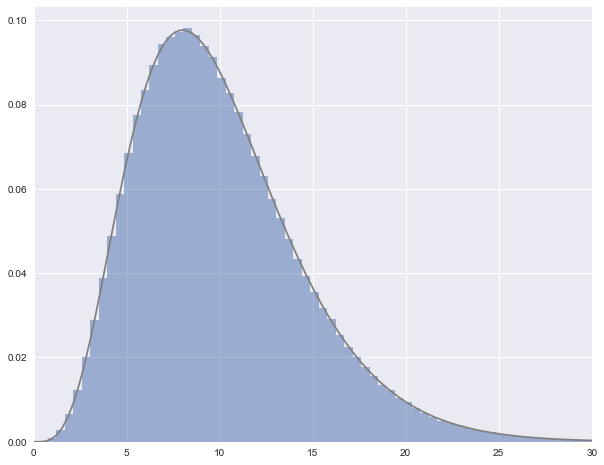

In [72]:
# 표본 데이터의 히스토그램과 밀도함수 시각화

plt.figure(figsize=(10,8))


rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)
plt.hist(chi2_sample,bins=100,density = True,alpha=0.5, label='chi2_sample')
plt.plot(xs,rv_true.pdf(xs),label = f'chi2({n})',color = 'gray')
plt.xlim(0,30)

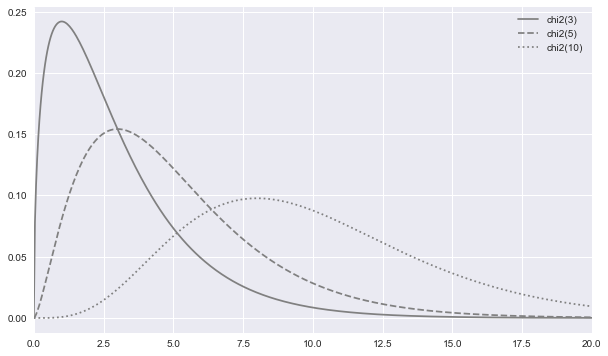

In [75]:
# 자유도 변화에 따른 카이제곱분포 : 자유도를 3, 5, 10으로 변화
plt.figure(figsize = (10,6))
xs = np.linspace(0,20,500)
for n, ls in zip([3,5,10],linestyles):
    rv = stats.chi2(n)
    plt.plot(xs,rv.pdf(xs),label = f'chi2({n})',ls = ls,color = 'gray')
plt.xlim(0,20)
plt.legend()

In [77]:
# 자유도 n = 5, 상위 5% 확률
rv = stats.chi2(5)
rv.isf(0.05)

11.070497693516355

#### t 분포
- 정규분포에서 모평균의 구간 추정 등에 사용되는 확률분포
- 확률변수  Z, Y는 서로 독립이고 Z는 표준정규분포 N(0,1)을, Y는 자유도가 n인 카이제곱분포 $\chi^2(n)$을 따를 때 t = ${Z}\over{\sqrt{{Y}\over{n}}}$의 확률분포를 자유도가 n인 t분포라고 한다.
- t 분포의 의미
  * 모분산을 모르는 상황에서도 표본평균의 분포에 새하여 이야기할 수 있다.
  * t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화함
  * 표본에서 계산한 표준오차로 표본평균을 표준화했을 경우의 결과가 t분포를 따른다는 사실을 이용하면 얻어낸 표본평균에 관한 불확실성을 짐작할 수 있다.
- t 분포의 특성
  * t 분포는 모집단이 정규분포이더라도 분산 $\sigma^2$이 알려져 있지 않고 표본의 수가 적은 경우에 평균 $\mu$에 대한 신뢰구간 추정 및 가설 검정에 아주 유용하게 쓰이는 분포이다
  * t 분포는 표준정규분포처럼 0을 중심으로 종형의 모습을 가진 대칭 분포이다.
  * t 분포는 꼬리는 표준정규분포보다 두껍다 (fat tail)
  * t 분포는 자유도 n에 따라 변하는데 자유도 n이 커짐에 따라 표준 정규분포 N(0,1)에 수렴한다. 통상 모집단의 분산이 알려져 있지 않을 경우 표본분포를 결정할 때 표본의 크기가 30 이하이면 t 분포를 그 크기가 30 이상이면 표준정규분포를 이용한다.

In [79]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)
sample_size = int(1e6)
z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = z_sample / np.sqrt(chi2_sample/n)

(-5.0, 5.0)

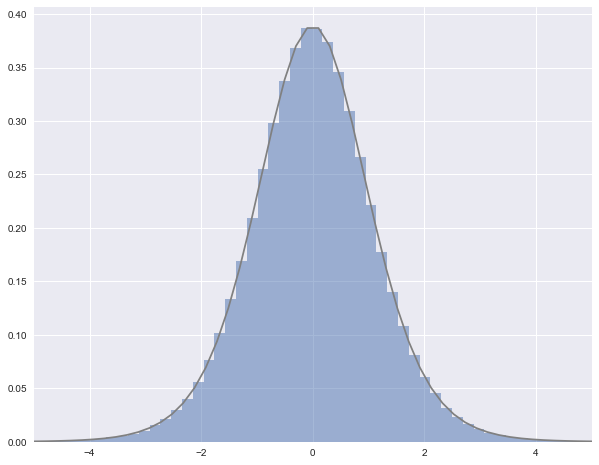

In [85]:
plt.figure(figsize = (10,8))

rv = stats.t(n)

xs = np.linspace(-10,10,100)
plt.hist(t_sample,bins=100,density = True,alpha=0.5, label='t_sample')
plt.plot(xs,rv.pdf(xs),label = f't({n})',color = 'gray')
plt.xlim(-5,5)

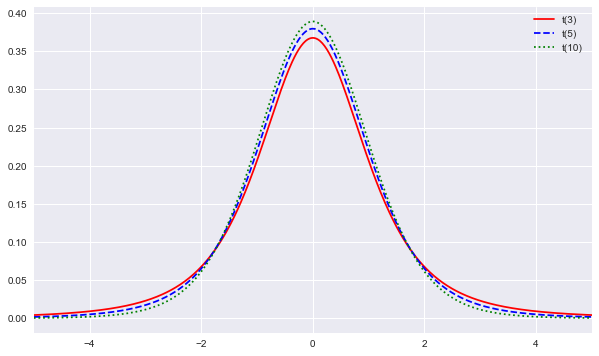

In [88]:
plt.figure(figsize = (10,6))
xs = np.linspace(-5,5,500)
for n, ls ,color in zip([3,5,10],linestyles,colors):
    rv = stats.t(n)
    plt.plot(xs,rv.pdf(xs),label = f't({n})',ls = ls,color = color)
plt.xlim(-5,5)
plt.legend()

In [89]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

#### F분포
- 확률변수 $Y_1,Y_2$는 서로 독립이고 각각 $Y_1$ ~ ${\chi}^2(n-1),Y_2$ ~ ${{\chi}^2(n_2)}$를 따를 때, F = ${Y_1/n_1}\over{Y_2/n_2}$의 확률분포를 자유도 $n_1,n_2$인 F 분포 F$(n_1,n_2)$라고 한다.
- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다.
- F분포가 취할수 있는 값은 0 이상인 실수이며 분포의 정점은 1에 가깝다.

In [104]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)
sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

(0.0, 6.0)

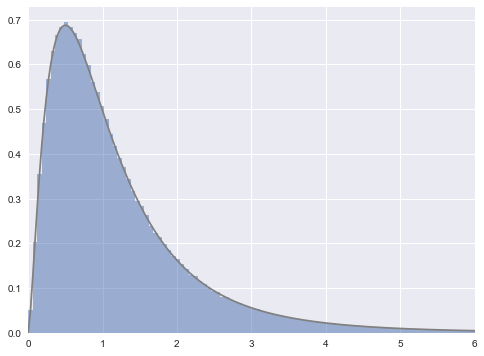

In [109]:
plt.figure(figsize = (8,6))

rv = stats.f(n1,n2)

xs = np.linspace(0,6,200)
plt.hist(f_sample,bins=100,range = (0,6),density = True,alpha=0.5, label='f_sample')
plt.plot(xs,rv.pdf(xs),label = f'f({n1},{n2})',color = 'gray')
plt.xlim(0,6)

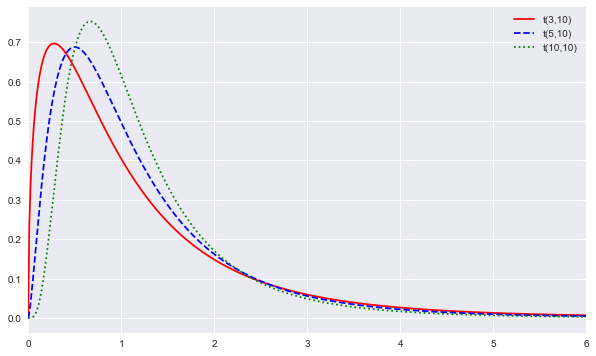

In [101]:
plt.figure(figsize = (10,6))
xs = np.linspace(0,6,500)
for n1, ls ,color in zip([3,5,10],linestyles,colors):
    rv = stats.f(n1,10)
    plt.plot(xs,rv.pdf(xs),label = f't({n1},10)',ls = ls,color = color)
plt.xlim(0,6)
plt.legend()

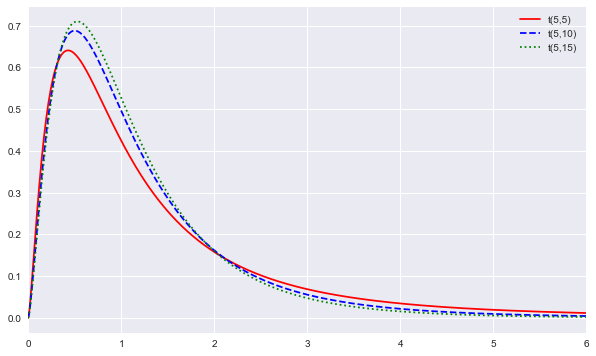

In [110]:
plt.figure(figsize = (10,6))
xs = np.linspace(0,6,500)
for n2, ls ,color in zip([5,10,15],linestyles,colors):
    rv = stats.f(5,n2)
    plt.plot(xs,rv.pdf(xs),label = f't(5,{n2})',ls = ls,color = color)
plt.xlim(0,6)
plt.legend()